<a href="https://colab.research.google.com/github/pathipakapujitha/Major-Project/blob/main/10Vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19   # transfer learning model
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [256, 256]

train_path = '/content/drive/MyDrive/3code/Train'
valid_path = '/content/drive/MyDrive/3code/Test'


In [ ]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/3code/Train/*')


In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)
prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)
model.summary()
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
# Use the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/3code/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
training_set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/3code/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)


Found 1500 images belonging to 3 classes.
Found 446 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  #callbacks=[early_stop],verbose=True
)

Epoch 1/10
47/47 [==============================] - 479s 10s/step - loss: 0.8351 - accuracy: 0.7607 - val_loss: 0.1737 - val_accuracy: 0.9350
Epoch 2/10
47/47 [==============================] - 46s 988ms/step - loss: 0.1877 - accuracy: 0.9287 - val_loss: 0.1173 - val_accuracy: 0.9596
Epoch 3/10
47/47 [==============================] - 51s 1s/step - loss: 0.1646 - accuracy: 0.9353 - val_loss: 0.1244 - val_accuracy: 0.9619
Epoch 4/10
47/47 [==============================] - 46s 982ms/step - loss: 0.1528 - accuracy: 0.9413 - val_loss: 0.1059 - val_accuracy: 0.9619
Epoch 5/10
47/47 [==============================] - 51s 1s/step - loss: 0.1337 - accuracy: 0.9493 - val_loss: 0.0939 - val_accuracy: 0.9709
Epoch 6/10
47/47 [==============================] - 53s 1s/step - loss: 0.1049 - accuracy: 0.9640 - val_loss: 0.0865 - val_accuracy: 0.9686
Epoch 7/10
47/47 [==============================] - 48s 1s/step - loss: 0.1235 - accuracy: 0.9507 - val_loss: 0.1499 - val_accuracy: 0.9417
Epoch 8/10
4

In [ ]:
y_pred = model.predict(test_set)

14/14 [==============================] - 7s 457ms/step


1/1 [==============================] - 1s 979ms/step
[[1. 0. 0.]]
0


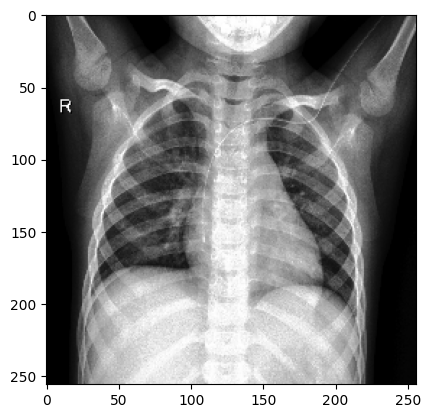

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/3code/Test/Normal/1.jpg', target_size=(256,256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
img_test = np.expand_dims(x, axis=0)

classes = model.predict(img_test)

print(classes)
values = classes[0]
index1 = np.argmax(values)
print(index1)


1/1 [==============================] - 0s 28ms/step
[[6.686193e-20 1.000000e+00 0.000000e+00]]
1


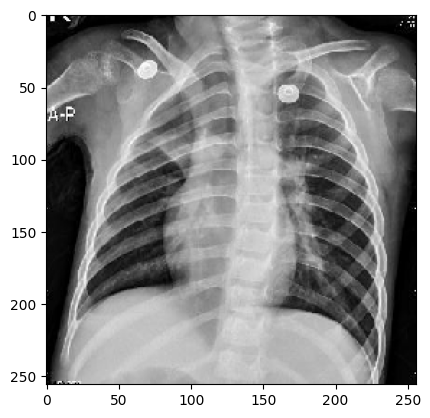

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/3code/Test/Pneumonia/17.jpg', target_size=(256,256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
img_test = np.expand_dims(x, axis=0)

classes = model.predict(img_test)

print(classes)
values = classes[0]
index1 = np.argmax(values)
print(index1)

1/1 [==============================] - 0s 19ms/step
[[0. 0. 1.]]
2


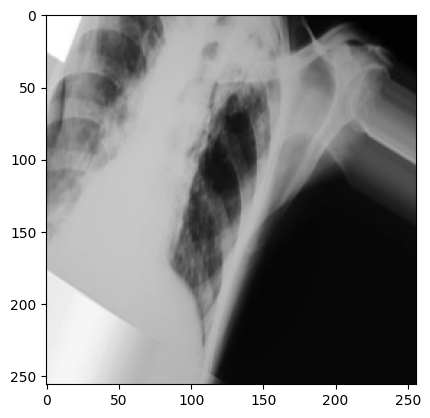

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/3code/Test/Tuberculosis/1.jpg', target_size=(256,256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
img_test = np.expand_dims(x, axis=0)

classes = model.predict(img_test)

print(classes)
values = classes[0]
index1 = np.argmax(values)
print(index1)

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/3code/model51_vgg19.h5')
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


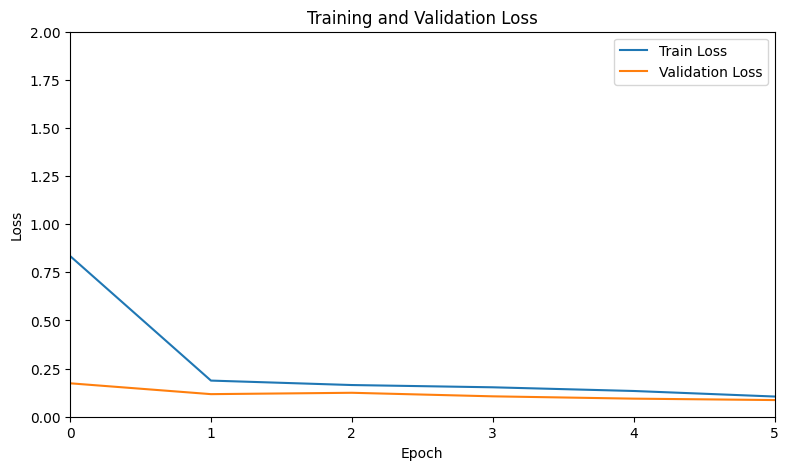

In [ ]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(r.history['loss'], label="Train Loss")
plt.plot(r.history['val_loss'], label="Validation Loss")
plt.xlim(0, 5)  # Adjust the x-axis limits as needed
plt.ylim(0.0, 2.0)  # Adjust the y-axis limits as needed
plt.legend()
plt.show()


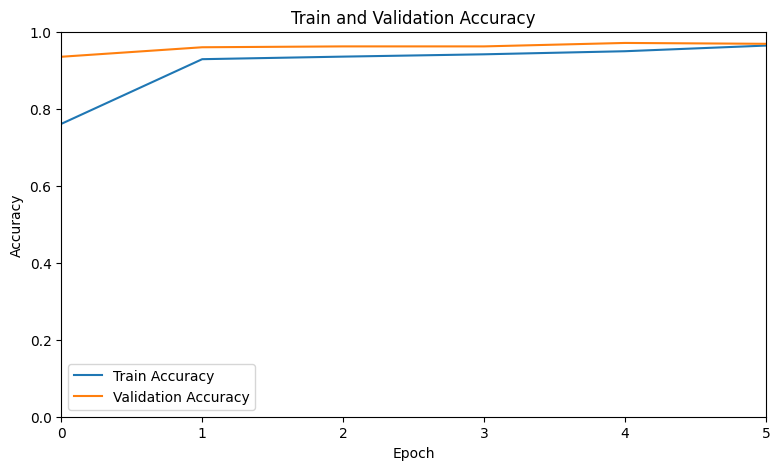

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)  # Changed subplot position to (1, 2, 2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(r.history['accuracy'], label="Train Accuracy")
plt.plot(r.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 5)  # Adjust the x-axis limits as needed
plt.ylim(0, 1.0)  # Adjust the y-axis limits as needed
plt.legend()
plt.show()


In [ ]:
training_accuracy=r.history['accuracy'][-1]
testing_accuracy=r.history['val_accuracy'][-1]
print("Total Training Accuracy:", training_accuracy)
print("Total Testing Accuracy:", testing_accuracy)

Total Training Accuracy: 0.9666666388511658
Total Testing Accuracy: 0.9596412777900696


In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/3code/model51_vgg19.h5')

In [ ]:
# Importing all important libraries
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import seaborn as sns           # for working with maps
import torch                    # Pytorch module
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model
import tensorflow as ts
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

%matplotlib inline

In [ ]:
train_data="/content/drive/MyDrive/3code/Train"
# Validation Data
valid_data="/content/drive/MyDrive/3code/Test"

In [ ]:
# Create a rescaling layer in a Keras model
rescale=keras.layers.Rescaling(scale=1.0/255)

In [ ]:
# Create TensorFlow tf.data.Dataset objects from image directories for training and validation data in Keras
# Images are loaded with the specified image size of (256, 256), and the function image_dataset_from_directory assigns labels based on subdirectory names
training_data =keras.utils.image_dataset_from_directory(train_data , image_size=(256, 256))
validation_data = keras.utils.image_dataset_from_directory(valid_data, image_size=(256, 256))

Found 1500 files belonging to 3 classes.
Found 446 files belonging to 3 classes.


In [ ]:
validation_data = keras.utils.image_dataset_from_directory(valid_data, image_size=(256, 256))

Found 446 files belonging to 3 classes.


In [ ]:
valid_gen  = validation_data.map(lambda image,label:(rescale(image),label))

In [ ]:
# Obtain the labels and predictions for the validation data.
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model.predict(x),1).numpy())

1/1 [==============================] - 0s 244ms/step


In [ ]:
# Flatten the nested lists of predictions and labels
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

<Figure size 400x400 with 0 Axes>

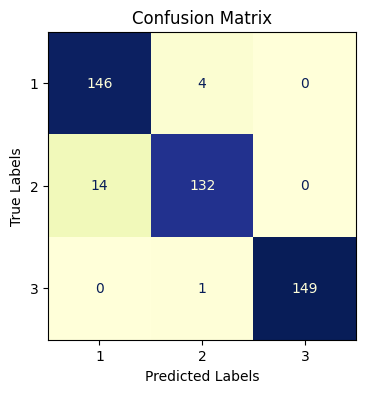

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (4,4))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,4)))
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate F1 score
f1 = f1_score(labels, predictions, average='weighted') * 100

# Calculate recall score
recall = recall_score(labels, predictions, average='weighted') * 100

# Calculate precision score
precision = precision_score(labels, predictions, average='weighted') * 100

print("F1 Score: {:.3f} %".format(f1))
print("Recall Score: {:.3f} %".format(recall))
print("Precision Score: {:.3f} %".format(precision))

F1 Score: 95.737 %
Recall Score: 95.740 %
Precision Score: 95.862 %
